# DATASET CRIMES IN BOSTON

## Description
Laporan kejadian kejahatan disediakan oleh Departemen Kepolisian Boston (BPD) untuk mendokumentasikan rincian awal seputar insiden yang ditanggapi oleh petugas BPD. Ini adalah kumpulan data yang berisi catatan dari sistem laporan insiden kejahatan baru, yang mencakup kumpulan bidang yang dikurangi yang difokuskan untuk menangkap jenis insiden serta kapan dan di mana itu terjadi.

data didapatkan dari:
https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston

## Latar Belakang
Departemen Kepolisian Boston (BPD) ingin membuat kebijakan baru untuk mengurangi tingkat kriminalitas di kota boston,sesuai dengan karakteristik kriminal yang ada di kota boston
## Pernyataan Masalah
Departemen Kepolisian Boston (BPD) ingin mengetahui bagaimana karakteristik dari kejahatan di Boston. selain itu  BPD, juga ingin mengetahui bagaimana karakteristik respon polisi dalam menangani suatu kejadian kejahatan. setelah mengetahui karakteristik kejahatan dan karakteristik respon polisi di boston, Departemen Kepolisian Boston (BPD) dapat membuat kebijakan dengan berlandaskan data yang ada, sehingga BPD dapat membuat kebijakan tepat yang dapat menurunkan atau mencegah kejahatan di boston.
## GOALS
1. mengetahui bagaimana karakteristik dari kejahatan di Boston dan karakteristik respon polisi dalam menangani suatu kejadian kejahatan di boston.
1. memberikan rekomendasi kebijakan yang dapat dilakukan oleh Departemen Kepolisian Boston (BPD)

## 1. DATA
### Import Library

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Read DataFrame

In [2]:
#Read dataframe "crime.csv"
df = pd.read_csv("crime.csv",encoding_errors='ignore')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
#Read "offense_codes.csv" 
df1 = pd.read_csv("offense_codes.csv",encoding_errors='ignore')
df1.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


Didapatkan bahwa DataFrame "offense_codes.csv" sudah terkandung di DataSet "crime.csv", maka dari itu analisis akan difokuskan hanya di DataSet "crime.csv" saja.

## 2. Data Understanding dan Cleaning


In [4]:
#melihat 5 baris data pertama dari DataFrame
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


DataFrame "crime.csv" terdiri dari 17 kolom yang berisikan:
1. incident_num	= Nomor Laporan di BPD
2. offense_code = Code Nomor dari Setiap Kejahatan
3. Offense_Code_Group_Description = Pengelompokan dari tiap kejahatan (kategori kejahatan)
4. Offense_Description = Penjelasan dari tiap kejahatan (kasus kejahatan)
5. district = District tempat kejadian perkara
6. reporting_area = Tempat pelaporan kejahatan, reporting area selalu terhubung dengan distrik tempat area perkara
7. shooting = Penembakan di tempat.
8. occurred_on = Tanggal dan Waktu kejadian kejahatan
9. Year = Tahun kejadian kejahatan 
10. Month = Bulan kejadian kejahatan 
11. Day of Week = Hari kejadian kejahatan
12. hour = Jam kejadian kejahatan 
13. UCR_Part = penggolongan bagian Kejahatan, di bagi menjadi 4 bagian(1,2, 3,other)
14. street = Nama jalan tempat kejadian perkara
15. lat = latitude dari tempat kejadian perkara
16. long = longitude dari tempat kejadian perkara
17. location = gabungan dari latitude dan longitude

In [5]:
#melihat jumlah kolom dan baris pada DataFrame
df.shape

(319073, 17)

In [6]:
# melihat sekilas info kolom DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

## 2.1 Mengecek Data Unique Ditiap Kolom

In [7]:
## mengecek data unique ditiap kolom
pd.set_option('display.max_colwidth', None)
list1 = []
for col in df.columns :
    list1.append([col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel_unique = pd.DataFrame(columns=['Nama Kolum', 'Jumlah Data Unique', 'Unique Sample'],
                     data=list1)
tabel_unique

,Nama Kolum,Jumlah Data Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[142052550, I010370257-00, I030217815-08, I050310906-00, I060168073-00, I080542626-00, I090317057-00, I090321958-00, I100033064-00, I100222105-02, I100340225-00, I100636670-00, I110177502-00, I110261417-00, I110372326-00, I110551302-00, I110611058-00, I110694557-00, I120069826-00, I120189428-00, I120201612-00, I120260724-01, I120283195-00, I120470733-00, I120595668-00, I120719309-00, I120720047-00, I130007264-01, I130031413-00, I130041200-00, I130084703-00, I130126035-00, I130194606-00, I130202615-00, I130204032-00, I130304171-00, I130325877-00, I130371627-00, I130452692-00, I130513834-00, I130559249-00, I130626822-00, I130634867-00, I130731947-00, I130739503-00, I130769339-00, I130789976-00, I140036361-00, I140039570-00, I140041532-00, I140042060-00, I140056633-00, I140110321-00, I140148421-00, I140160427-01, I140173500-00, I140188130-00, I140254285-00, I140295154-00, I140300475-02, I140311903-00, I140319608-00, I140346143-00, I140356025-00, I140372066-00, I142002101-00, I142004681-00, I142010194-00, I142013220-00, I142014620-00, I142016089-00, I142017108-00, I142020701-00, I142020933-00, I142022633-00, I142023661-00, I142024796-00, I142025834-00, I142025900-00, I142029747-00, I142032469-00, I142033071-00, I142033219-00, I142034820-00, I142035471-00, I142036405-00, I142039468-00, I142041046-00, I142041685-01, I142042232-00, I142044610-00, I142045442-00, I142045856-00, I142045979-00, I142048539-00, I142049917-00, I142050174-00, I142050207-00, I142051855-00, I142052022-00, ...]"
1,OFFENSE_CODE,222,"[111, 112, 121, 123, 301, 311, 315, 334, 335, 338, 339, 349, 351, 361, 371, 381, 402, 403, 404, 413, 423, 432, 511, 520, 521, 522, 527, 530, 540, 541, 542, 547, 560, 561, 562, 611, 612, 613, 614, 615, 616, 617, 618, 619, 623, 624, 627, 629, 633, 634, 637, 639, 670, 706, 714, 724, 727, 735, 770, 801, 802, 803, 804, 900, 1001, 1002, 1102, 1105, 1106, 1107, 1108, 1109, 1201, 1300, 1302, 1304, 1402, 1415, 1501, 1502, 1503, 1504, 1510, 1601, 1602, 1603, 1605, 1610, 1620, 1805, 1806, 1807, 1810, 1815, 1825, 1830, 1831, 1832, 1841, 1842, ...]"
2,OFFENSE_CODE_GROUP,67,"[Aggravated Assault, Aircraft, Arson, Assembly or Gathering Violations, Auto Theft, Auto Theft Recovery, Ballistics, Biological Threat, Bomb Hoax, Burglary - No Property Taken, Commercial Burglary, Confidence Games, Counterfeiting, Criminal Harassment, Disorderly Conduct, Drug Violation, Embezzlement, Evading Fare, Explosives, Fire Related Reports, Firearm Discovery, Firearm Violations, Fraud, Gambling, HOME INVASION, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Harassment, Harbor Related Incidents, Homicide, INVESTIGATE PERSON, Investigate Person, Investigate Property, Landlord/Tenant Disputes, Larceny, Larceny From Motor Vehicle, License Plate Related Incidents, License Violation, Liquor Violation, Manslaughter, Medical Assistance, Missing Person Located, Missing Person Reported, Motor Vehicle Accident Response, Offenses Against Child / Family, Operating Under the Influence, Other, Other Burglary, Phone Call Complaints, Police Service Incidents, Prisoner Related Incidents, Property Found, Property Lost, Property Related Damage, Prostitution, Recovered Stolen Property, Residential Burglary, Restraining Order Violations, Robbery, Search Warrants, Service, Simple Assault, Towed, Vandalism, Verbal Disputes, Violations, Warrant Arrests]"
3,OFFENSE_DESCRIPTION,244,"[A&B HANDS, FEET, ETC. - MED. ATTENTION REQ., A&B ON POLICE OFFICER, ABDUCTION - INTICING, AFFRAY, AIRCRAFT INCIDENTS, ANIMAL ABUSE, ANIMAL CONTROL - DOG BITES - ETC., ANIMAL INCIDENTS, ANNOYING AND ACCOSTIN, ANNOYING AND ACCOSTING, ARSON, ASSAULT & BATTERY, ASSAULT & BATTERY D/W - KNIFE, ASSAULT & BATTERY D/W - OTHER, ASSAULT & BATTERY D/W - OTHER ON POLICE OFFICER, ASSAULT - AGGRAVATED, ASSAULT - AGGRAVATED - BATTERY, ASSAULT - SIMPLE, ASSAULT D/W - KNIFE ON POLICE OFFICER, ASSAULT D/W - OTHER, ASSAULT SIMPLE - BATTERY, AUTO THEFT,

didapatkan beberapa data yang bernilai aneh seperti:
1. kolom **reporting area** terdapat data string kosong(''), dan data bernilai 000 yang memiliki district berbeda beda,umumnya satu reporting area hanya mewakili 1/2 distrik. Penangannya nanti akan diganti menjadi NaN.
1. kolom **lat** dan **long** terdapat nilai -1, sesuai dengan domain knowledge kita ini adalah suatu hal yang tidak mungkin.Penangannya nanti akan diganti menjadi NaN.
1. kolom **location** nilai ((-1.00000000, -1.00000000), (0.00000000, 0.00000000)), sesuai dengan domain knowledge kita ini adalah suatu hal yang tidak mungkin. Penangannya nanti akan diganti menjadi NaN.

selain itu juga beberapa kolom akan dilakukan modifikasi seperti:
1. mengganti code yang ada di kolom district dengan nama kotanya agar memudahkan interpretasi
2. mengganti tipe data kolom occured date menjadi datetime
3. mengekstrak kolom occured date menjadi beberapa kolom, seperti year,month,day, dll agar meminimalisir apabila ada kesalahan pada data awal
4. membagi UCR_Part hanya menjadi 3 bagian saja(sebelumnya 4)
5. menghapus kolom OFFENSE_CODE karena sudah diwakilkan oleh OFFENSE_CODE_GROUP dan OFFENSE_DESCRIPTION

## 2.2 Penanganan Beberapa Kolom

### 2.2.1. Penanganan Kolom Reporting Area

In [8]:
#kolom reporting area, mengganti string kosong kosong dan whitespace menjadi nan
df['REPORTING_AREA'] = df['REPORTING_AREA'].replace('000',np.nan)
df['REPORTING_AREA'] = df['REPORTING_AREA'].replace(" ",np.nan)

In [9]:
#pengecekan ulang apakah nilai 000 dan string kosong sudah hilang
df[(df['REPORTING_AREA']=="000") | (df['REPORTING_AREA']==" ")]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


didapatkan bahwa nilai "000" dan "white space" sudah menjadi NaN 

### 2.2.2 Penanganan Kolom **lat** dan Kolom **long**

In [10]:
# merubah data yang mempunya nilai -1.0 di kolom lat dan long menjadi NaN
df['Lat'] = df['Lat'].replace(-1.0, np.nan)
df['Long'] = df['Long'].replace(-1.0, np.nan)

In [11]:
#pengecekan ulang apakah nilai 000 dan string kosong sudah hilang
df[(df['Lat']==-1.0) | (df['Long']==-1.0)]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


didapatkan bahwa nilai Lat = -1.0 dan Long = -1.0 sudah menjadi NaN 

## 2.2.3. Penanganan Kolom Location

In [12]:
# merubah data yang mempunya nilai (-1.00000000, -1.00000000) dan (0.00000000, 0.00000000) di kolom location menjadi NaN
df['Location'] = df['Location'].replace('(-1.00000000, -1.00000000)', np.nan)
df['Location'] = df['Location'].replace('(0.00000000, 0.00000000)', np.nan)

In [13]:
# mengecek apakah kolom location masih mempunya nilai (-1.00000000, -1.00000000) dan (0.00000000, 0.00000000)
df[(df["Location"]=="(-1.00000000, -1.00000000)") | (df["Location"]=="(0.00000000, 0.00000000)")]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


didapatkan sudah tidak ada lagi data bernilai (-1.00000000, -1.00000000) dan (0.00000000, 0.00000000)

## 2.2.4. penanganan kolom district
Mengganti kode districk dengan nama distrik agar memudahkan interpretasi berdasarkan sumber https://www.boston.gov/departments/police

In [14]:
#Mengganti isi data dari kolom district
df.DISTRICT.replace({'A1' : 'Downtown',
'A15': 'Charlestown',
'A7': 'East Boston',
'B2': 'Roxbury',
'B3': 'Mattapan',
'C6': 'South Boston',
'C11': 'Dorchester',
'D4': 'South End',
'D14': 'Brighton',
'E5': 'West Roxbury',
'E13': 'Jamaica Plain',
'E18':'Hyde Park'}, inplace=True)

## 2.2.5. penanganan kolom occured date
mengganti tipe data kolom occured date menjadi date time

In [15]:
#mengganti tipe data date menjadi datetime
df["OCCURRED_ON_DATE"] = pd.to_datetime(df['OCCURRED_ON_DATE'])

## 2.2.6. penanganan kolom year, month, dayofweek, hour
melakukan ekstraksi pada kolom occured date untuk mendapatkan year, month, dayofweek, hour. dilakukan untuk meminimalisir kesalahan dari input.

In [16]:
#melakukan ekstarasi data dari kolom occured on date
df["YEAR"]=df["OCCURRED_ON_DATE"].dt.year
df["MONTH"]=df["OCCURRED_ON_DATE"].dt.month
df["DAY_OF_WEEK"]=df["OCCURRED_ON_DATE"].dt.day_name()
df["HOUR"]=df["OCCURRED_ON_DATE"].dt.hour

## 2.2.7. penanganan kolom ucr_part
Membagi UCR_Part menjadi hanya 3 bagian(sebelumnya 4 bagian):
1. part One
2. part Two
3. part Three <br>
berdasarkan sumber https://operationladyjustice.usdoj.gov/sites/g/files/xyckuh281/files/media/document/oljfbiucrfactsheet.pdf dan https://www2.fbi.gov/ucr/cius_04/appendices/appendix_02.html

In [17]:
#mengecek offense code group dari ucr_part other
df[df["UCR_PART"]=="Other"]["OFFENSE_CODE_GROUP"].unique()

array(['Arson', 'License Plate Related Incidents', 'Auto Theft Recovery',
       'Other', 'Manslaughter', 'Burglary - No Property Taken'],
      dtype=object)

diketahui UCR part dengan kelas other memiliki offense code group :Arson, License Plate Related Incidents, Auto Theft Recovery, Other, Manslaughter, Burglary - No Property Taken. setelah di laukanan analisis melalui sumber, diketahui bahwa **offense code group** seperti : *arson, auto theft recovery, Burglary - No Property Taken, manslaughter* masuk kedalam UCR_part One, sedangkan offense code group dengan kelas License Plate Related Incidents'dan other dimasukkan kedalam UCR_part 2

In [18]:
#memasukkan UCR PART other sesuai dengan UCR Part nya menurut sumber
code_group = [['Other','License Plate Related Incidents'],['Arson', 'Auto Theft Recovery', 'Manslaughter', 'Burglary - No Property Taken']]
ucr = ['Part Two', 'Part One']

for code, part in zip(code_group, ucr) :
    df.loc[df['OFFENSE_CODE_GROUP'].isin(code), 'UCR_PART'] = part

In [19]:
#pengecekan apakah UCR part kelas other masih ada
df[df["UCR_PART"]=="Other"]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


sudah tidak ada UCR_PART kelas Other

### problem pada UCR PART Part Two 
Ditemukan Bahwa UCR PART kelas Part Two memiliki OFFENSE_CODE_GROUP yang bernilai Other. OFFENSE_CODE_GROUP other yang terdapat di UCR part Two ini juga memiliki persentasi yang tinggi. sesuai dengan domain knowledge seharusnya klasifikasi OFFENSE_CODE_GROUP yang other ialah kejahatan-kejahatan yang jarang dilakukan, sehingga di golongkan kepada OFFENSE_CODE_GROUP kelas other. seharusnya kejahatan apabila sering dilakukan akan masuk kedalam OFFENSE_CODE_GROUP nya sendiri. maka dari itu OFFENSE_CODE_GROUP other pada UCR part 2 yang memiliki nilai 3 tertinggi akan digolongkan lagi sesuai domain knowledge offense description dari berbagai sumber yang didapatkan

In [20]:
#melihat jumlah data yang berkategori kejahatan Other di UCR part 2
df[df['UCR_PART']=="Part Two"]['OFFENSE_CODE_GROUP'].value_counts()

Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Violations                          6095
Fraud                               5829
Harassment                          4007
Confidence Games                    3147
Disorderly Conduct                  2611
Firearm Violations                  1777
Restraining Order Violations        1607
Recovered Stolen Property           1455
Counterfeiting                      1454
Liquor Violation                    1052
Ballistics                           981
Operating Under the Influence        574
License Plate Related Incidents      560
Offenses Against Child / Family      545
Evading Fare                         407
Embezzlement                         296
Prisoner Related Incidents           230
Prostitution                         207
Criminal Harassment                  131
Fire Related Reports                 126
Bomb Hoax       

In [21]:
#meihat OFFENSE_DESCRIPTION berdasarkan OFFENSE_CODE_GROUP other
df[df['OFFENSE_CODE_GROUP']=="Other"]['OFFENSE_DESCRIPTION'].value_counts()

THREATS TO DO BODILY HARM                         9042
TRESPASSING                                       3254
VAL - VIOLATION OF AUTO LAW - OTHER               2894
OTHER OFFENSE                                      644
VIOLATION - CITY ORDINANCE                         370
INTIMIDATING WITNESS                               309
DANGEROUS OR HAZARDOUS CONDITION                   307
POSSESSION OF BURGLARIOUS TOOLS                    227
INVESTIGATION FOR ANOTHER AGENCY                   194
EXTORTION OR BLACKMAIL                             188
REPORT AFFECTING OTHER DEPTS.                      166
WEAPON - OTHER - OTHER VIOLATION                   147
OBSCENE MATERIALS - PORNOGRAPHY                     80
ANIMAL ABUSE                                        64
VIOLATION - CITY ORDINANCE CONSTRUCTION PERMIT      51
KIDNAPPING/CUSTODIAL KIDNAPPING                     48
KIDNAPPING - ENTICING OR ATTEMPTED                  44
VIOLATION - HAWKER AND PEDDLER                      15
ABDUCTION 

Penggolongan OFFENSE_DESCRIPTION <br>
3 data terbanyak pada offense description yang ada di OFFENSE_CODE_GROUP other akan dikelompokan sebagaimana berikut:
1. OFFENSE_DESCRIPTION : THREATS TO DO BODILY HARM, akan dimasukkan ke OFFENSE_CODE_GROUP simple assault. dikarenankan menurut https://www.nolo.com/legal-encyclopedia/assault-battery-aggravated-assault-33775.htmlMengangkat diibaratkan seseorang menganngkat tinju pada seseorang dan mengancam akan memukul mereka sudah bisa dimasukkan menjadi menjadi kejahatan simple assault.
2. OFFENSE_DESCRIPTION : TRESPASSING , akan dimasukkan ke kelompok Burglary - No Property Taken dikarenakan berdasarkan https://www.law.cornell.edu/wex/trespass trespassing/menerobos sudah bisa dikelompokan kedalam pencurian, yaitu pencurian hak orang lain dengan memaksa masuk ke wilayahnya kepunyaannya
3. OFFENSE_DESCRIPTION : VAL - VIOLATION OF AUTO LAW - OTHER, setelah dilakukan analisis, kejahatan VAL - VIOLATION OF AUTO LAW - OTHER, akan dimasukkan ke kelompok kejahatan Violations dikarenakan semua yang kejahatan yang berjenis VAL akan masuk kedalam grup Violations.

In [22]:
#memasukkan OFFENSE_DESCRIPTION = THREATS TO DO BODILY HARM ke OFFENSE_CODE_GROUP kelas Simple Assault
df.loc[df["OFFENSE_DESCRIPTION"]=="THREATS TO DO BODILY HARM","OFFENSE_CODE_GROUP"]="Simple Assault"

In [23]:
#mengecek OFFENSE_CODE_GROUP baru untuk OFFENSE_DESCRIPTION = THREATS TO DO BODILY HARM
df.loc[df["OFFENSE_DESCRIPTION"]=="THREATS TO DO BODILY HARM"]["OFFENSE_CODE_GROUP"]

13        Simple Assault
18        Simple Assault
83        Simple Assault
95        Simple Assault
117       Simple Assault
               ...      
318649    Simple Assault
318658    Simple Assault
318832    Simple Assault
318860    Simple Assault
319028    Simple Assault
Name: OFFENSE_CODE_GROUP, Length: 9042, dtype: object

In [24]:
#memasukkan OFFENSE_DESCRIPTION = TRESPASSING ke OFFENSE_CODE_GROUP kelas Burglary - No Property Taken
#mengganti UCR Part OFFENSE_DESCRIPTION = TRESPASSING sesuai dengan UCR Part kategori kejahatan yang baru
df.loc[df["OFFENSE_DESCRIPTION"]=="TRESPASSING","OFFENSE_CODE_GROUP"] = "Burglary - No Property Taken"
df.loc[df["OFFENSE_DESCRIPTION"]=="TRESPASSING","UCR_PART"] = "Part One"

In [25]:
#mengecek OFFENSE_CODE_GROUP dan UCR Part baru untuk OFFENSE_DESCRIPTION = TRESPASSING
df.loc[df["OFFENSE_DESCRIPTION"]=="TRESPASSING"][["OFFENSE_CODE_GROUP","UCR_PART"]]

,OFFENSE_CODE_GROUP,UCR_PART
148,Burglary - No Property Taken,Part One
180,Burglary - No Property Taken,Part One
221,Burglary - No Property Taken,Part One
490,Burglary - No Property Taken,Part One
492,Burglary - No Property Taken,Part One
...,...,...
318863,Burglary - No Property Taken,Part One
318933,Burglary - No Property Taken,Part One
318960,Burglary - No Property Taken,Part One
318961,Burglary - No Property Taken,Part One


In [26]:
#mengecek isi dari kejahatan yang ada di OFFENSE_CODE_GROUP kelas Violations'
df[df["OFFENSE_CODE_GROUP"]=='Violations'][['OFFENSE_DESCRIPTION']].value_counts()

OFFENSE_DESCRIPTION                     
VAL - OPERATING AFTER REV/SUSP.             2618
VAL - OPERATING WITHOUT LICENSE             1963
VAL - OPERATING UNREG/UNINS CAR             1051
VAL - OPERATING W/O AUTHORIZATION LAWFUL     463
dtype: int64

In [27]:
#memasukkan OFFENSE_DESCRIPTION = VAL - VIOLATION OF AUTO LAW - OTHER ke OFFENSE_CODE_GROUP kelas Violation
df.loc[df["OFFENSE_DESCRIPTION"]=="VAL - VIOLATION OF AUTO LAW - OTHER","OFFENSE_CODE_GROUP"] = "Violations"

In [28]:
#mengecek OFFENSE_CODE_GROUP baru untuk OFFENSE_DESCRIPTION = VAL - VIOLATION OF AUTO LAW - OTHER
df[df["OFFENSE_DESCRIPTION"]=='VAL - VIOLATION OF AUTO LAW - OTHER'][['OFFENSE_CODE_GROUP']]

,OFFENSE_CODE_GROUP
29,Violations
125,Violations
134,Violations
196,Violations
514,Violations
...,...
317985,Violations
317993,Violations
317998,Violations
318221,Violations


In [29]:
#mengecek isi data dan jumlahnya pada kolom OFFENSE_CODE_GROUP di UCR Part 2
df[df["UCR_PART"]=="Part Two"]["OFFENSE_CODE_GROUP"].value_counts()

Simple Assault                     24868
Drug Violation                     16548
Vandalism                          15415
Violations                          8989
Fraud                               5829
Harassment                          4007
Confidence Games                    3147
Other                               2885
Disorderly Conduct                  2611
Firearm Violations                  1777
Restraining Order Violations        1607
Recovered Stolen Property           1455
Counterfeiting                      1454
Liquor Violation                    1052
Ballistics                           981
Operating Under the Influence        574
License Plate Related Incidents      560
Offenses Against Child / Family      545
Evading Fare                         407
Embezzlement                         296
Prisoner Related Incidents           230
Prostitution                         207
Criminal Harassment                  131
Fire Related Reports                 126
Bomb Hoax       

### 2.2.8. Penanganan kolom **OFFENSE_CODE**
menghapus kolom OFFENSE_CODE karena sudah diwakilkan oleh OFFENSE_CODE_GROUP dan OFFENSE_DESCRIPTION

In [30]:
#menghapus kolom Offense Code
df.drop(columns="OFFENSE_CODE",inplace=True)

### 2.2.9. menambahkan kolom week
kolom week ialah kolom yang menjelaskan status hari dalam 1 minggu. contoh : weekday dan weekend.

In [31]:
# menambah kolom WEEK berdasarkan DAY_OF_WEEK
df.insert(9, 'WEEK', df['DAY_OF_WEEK'].apply(lambda x : 'Weekend' if (x == 'Saturday') | (x == 'Sunday') else 'Weekday'))#['WEEK'] = df['DAY_OF_WEEK'].apply(lambda x : 'Weekend' if (x == 'Saturday') | (x == 'Sunday') else 'Weekday')

In [32]:
# melihat hari dan status minggunya
df[['DAY_OF_WEEK', 'WEEK']].sample(10)

,DAY_OF_WEEK,WEEK
55340,Friday,Weekday
6347,Saturday,Weekend
146275,Tuesday,Weekday
203293,Saturday,Weekend
128098,Saturday,Weekend
141787,Friday,Weekday
78614,Saturday,Weekend
200097,Wednesday,Weekday
180433,Thursday,Weekday
217700,Thursday,Weekday


## 2.3 mencari dan menghilangkan data duplikat
setelah kita menangani dan memodifikasi beberapa kolom, selanjutnya kita akan Menghapus data duplikat (Baris data yang memiliki nilai yang sama persis ditiap kolomnya). data duplicat kemungkinan terjadi karena kesalahan disaat input data.

In [33]:
#mencari jumlah duplicate pada DataFrame
df.duplicated().sum()

24

ditemukan terdapat 24 baris data yang memiliki nilai yang sama ditiap kolomnya

In [34]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

"df.drop_duplicates(inplace=True)" digunakan untuk menghapus baris yang tiap kolom nya mempunyai data yang persis sama dengan baris lainnya.<br>
tetapi setelah dilanjutkan analisis lebih lanjut kolom incident_number bukanlah primary key, karna memiliki nilai duplikat di kolomnya. maka memungkinan ada yang memiliki duplikat incident_number. author biarkan karna walaupun memiliki incident_number yang sama tapi memiliki crime_description yang berbeda di asumsikan bahwa dalam satu incident_number dapat terjadi beberapa kejahatan dalam satu waktu bersamaan.

## 2.4 mencari dan menghilangkan missing value

In [35]:
#melihat jumlah missing di setiap kolom
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({"total_missing" : df.isna().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False)

,total_missing,percent_missing
SHOOTING,318030,99.680613
Location,20743,6.501509
Long,20743,6.501509
Lat,20743,6.501509
REPORTING_AREA,20263,6.351062
STREET,10871,3.407314
DISTRICT,1765,0.553207
UCR_PART,90,0.028209
DAY_OF_WEEK,0,0.000000
HOUR,0,0.000000


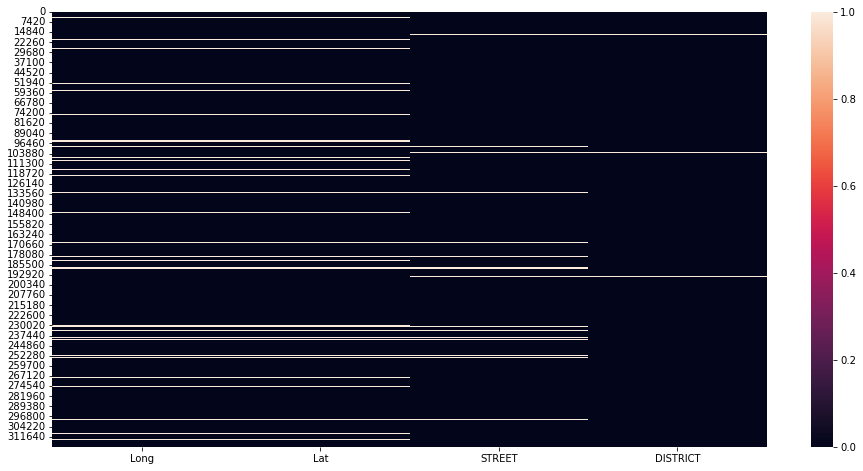

In [36]:
#visualisasi missing value
plt.figure(figsize=(16,8))
sns.heatmap(df[["Long","Lat","STREET","DISTRICT"]].isna())
plt.show()

## penanganan missing value
sebenarnya ada banyak cara untuk menangani missing value:

pertama, menghapus baris/kolom yang berisi missing value. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 32%).
kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki missing value. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median atau modus. Menghapus data akan menjadi opsi terakhir.
* Dapat dilihat kolom "shooting" memiliki missing value terbanyak dengan total 99%, disusul kolom "lan"(6.5%), "long"(6.5%), REPORTING_AREA(6.3%), "STREET"(3%), DISTRICT(0,5%), UCR_PART(0.03%).<br> 
* Dapat dilihat dari visualisasi juga bahwa setiap kolom "lat" yang kosong, kemungkinan kolom "long" kosong juga.
<br>
* penanganan yang akan dilakukan pada missing value pada DataFrame ini ialah 
    1. Menghapus kolom "shooting" karena memiliki missing value sampe 99 persen. karena kita tidak punya cukup bukti juga untuk mengasumsikan bahwa data yang kosong pada kolom shooting itu tidak melalakukan penembakan.
    1. mengisi kolom UCR_Part dengan Domain Knowledge kita berdasarkan sumber
    1. Menghapus baris yang terdapat missing value pada kolom "lan", "reporting area", "long", "district", "UCR_Part", '"stree", "location" karna missing value memiliki proporsi yang rendah(<10%) 
landasan argumen dalam menangani missing value:
sebenarnya ada banyak cara untuk menangani missing value:
pertama, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli.

kedua, menghapus baris/kolom yang berisi missing value apabila missing value hanya beberapa persen di data kita. tidak ada persenan yang mutlak untuk menjadi dasar untuk minimal untuk menghapus missing value. dalam beberapa sumber dikatakan masih normal untuk menghapus data missing value apabila missing value masih di bawah 10%. sedangkan data kita memiliki missing value paling besar hanya 6 persen. maka cara ini yang akan sering dipilih author dalam menangani missing value.

### 2.4.1 penanganan missing value pada kolom shooting
kolom shooting akan dihapus saja, karena kolom shooting hanya terisi 5 persen saja kita tidak punya cukup bukti bahwa nilai yang kosong itu benar tidak melakukan penembakan.

In [37]:
# menghapus kolom shooting
df.drop(columns="SHOOTING", inplace= True)

### 2.4.2 penangan missing value pada kolom UCR_Part
kolom UCR_Part dengan Domain Knowledge kita berdasarkan domain knowledge

In [38]:
#melihat kategori kejahatan yang Mempunyai missing value di UCR Partnya
df[df["UCR_PART"].isna()][['OFFENSE_CODE_GROUP']].value_counts()

OFFENSE_CODE_GROUP                       
HOME INVASION                                77
HUMAN TRAFFICKING                             7
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
dtype: int64

Penggolongan UCR_PART <br>
OFFENSE_CODE_GROUP yang Mempunyai missing value di UCR Partnya akan di isi sebagaimana berikut:
1. OFFENSE_CODE_GROUP : HOME INVASION, akan dimasukkan ke UCR_PART Part One. dikarenankan menurut https://www.bostoncriminaldefenselawyers.com  Home INvasion adalah bagian dari Buglary, sedangkanBuglary sendiri itu masuk dalam kejahatan bagian 1
1. OFFENSE_CODE_GROUP : HUMAN TRAFFICKING dan HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE , akan dimasukkan ke UCR_PART Part One. dikatakan dari https://ncvc.dspacedirect.org/handle/20.500.11990/1171  bahwa HUMAN TRAFFICKING dan HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE ialah kejahatan UCR Part 1
1. OFFENSE_CODE_GROUP : INVESTIGATE PERSON, akan dimasukkan ke UCR_PART Part Three. karna mayoritas INVESTIGATE PERSON masuk kedalam UCR Part 3

In [39]:
#memasukkan UCR PART sesuai dengan UCR Part nya menurut sumber
code_group = [['HOME INVASION','HUMAN TRAFFICKING','HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],['INVESTIGATE PERSON']]
ucr = ['Part One', 'Part Three']

for code, part in zip(code_group, ucr) :
    df.loc[df['OFFENSE_CODE_GROUP'].isin(code), 'UCR_PART'] = part

### 2.4.3 penangan missing value pada kolom **lan**, **reporting area**, **long**, **district**, **UCR_Part**, **street**, **location**
baris data yang mempunyai nilai kosong di kolom **lan**, **reporting area**, **long**, **district**, **UCR_Part**, **street**, **location** akan dihapus

In [40]:
#menghapus data
df.dropna(inplace= True)

## 2.5 mengganti nama kolom
nama kolom akan diganti agar memudahkan interpretasi dan enak dilihat mata

In [41]:
# mengganti nama kolom
rename = {'INCIDENT_NUMBER' : 'Incident_Number',
        'OFFENSE_CODE_GROUP':'Crime Classification',
          'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'REPORTING_AREA' : 'Reporting Area',
          'STREET':'Street',        
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          "DAY" : "Day",
          'DAY_OF_WEEK':'Day Name',
          'HOUR':'Hour',
         'UCR_PART' : 'UCR Part'}

df.rename(columns=rename, inplace=True)

## 2.6 MEMBAGI 2 DATAFRAME BERDASARKAN UCR_PART
#### * sekilas tentang UCR Part<br>
Uniform Crime Reporting (UCR) adalah sistem yang dibuat Biro Investigasi Federal (FBI) sebagai upaya statistik nasional dari lembaga penegak hukum federal, negara bagian, lokal, dan suku mewakili lebih dari 98 persen dari total populasi AS. Program ini didasarkan pada partisipasi sukarela untuk memberikan gambaran nasional tentang sifat dan ruang lingkup kejahatan. berdasarkan sistem UCR_Part ini hanya di bagi menjadi 2 bagian saja(Part I dan Part II).

#### * UCR Part understanding <br>
Setelah melakukan menganalisis Group terhadap tiap UCR_Part nya didapatkan kesimpulan bahwa, data yang yang memiliki UCR_Part 1 dan Part 2, merupakan laporan kejahatan yang diterima di kepolisian department boston, contoh pencurian, pembunuhan, narkoba, dll. Sedangkan data yang memiliki UCR_part Part 3, merupakan respon yang akan dilakukan dari kepolisian department Boston seperti investigasi seseorang, penangkapan, bantuan medis, bantuan kecelakaan lalu lintas,dll.

maka dari itu apabila ingin menganalisa kejahatan di Boston hanya perlu menganalisa UCR_Part Part I dan Part II, ssedangkan untuk menganalisa bagaimana respon polisi, yang digunakan ialah UCR_Part Part III.

maka dari itu Data akan dibagi menjadi 2, untuk memudahkan menganalisa kejahatan di kota boston dan bagaimana respon kota polisi di kota boston.

## Melihat kategori kejahatan berdasarkan UCR

In [42]:
### Melihat kategori kejahatan berdasarkan UCR Part 1
df[df["UCR Part"]=="Part One"]["Crime Classification"].unique()

array(['Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle',
       'Residential Burglary', 'Aggravated Assault', 'Other Burglary',
       'Burglary - No Property Taken', 'Arson', 'Auto Theft Recovery',
       'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Manslaughter',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
      dtype=object)

In [43]:
### Melihat kategori kejahatan berdasarkan UCR part 2
df[df["UCR Part"]=="Part Two"]["Crime Classification"].unique()

array(['Vandalism', 'Simple Assault', 'Restraining Order Violations',
       'Violations', 'Harassment', 'Ballistics', 'Fire Related Reports',
       'Disorderly Conduct', 'Other', 'Fraud', 'Drug Violation',
       'License Plate Related Incidents', 'Firearm Violations',
       'Bomb Hoax', 'Counterfeiting', 'Liquor Violation',
       'Operating Under the Influence', 'Confidence Games',
       'Recovered Stolen Property', 'Offenses Against Child / Family',
       'Prostitution', 'Evading Fare', 'Prisoner Related Incidents',
       'Embezzlement', 'Criminal Harassment', 'Explosives',
       'Phone Call Complaints', 'Missing Person Reported',
       'Biological Threat', 'Gambling'], dtype=object)

part I dan II dipenuhi dengan kasus-kasus kriminal

In [44]:
### Melihat kategori kejahatan berdasarkan UCR part 3
df[df["UCR Part"]=="Part Three"]["Crime Classification"].unique()

array(['Towed', 'Investigate Property', 'Motor Vehicle Accident Response',
       'Verbal Disputes', 'Fire Related Reports', 'Property Lost',
       'Assembly or Gathering Violations', 'Medical Assistance',
       'Property Found', 'Police Service Incidents',
       'Property Related Damage', 'Missing Person Reported',
       'Investigate Person', 'Warrant Arrests', 'Firearm Discovery',
       'Landlord/Tenant Disputes', 'Missing Person Located', 'Service',
       'Search Warrants', 'License Violation', 'Harbor Related Incidents',
       'Explosives', 'Aircraft', 'Prisoner Related Incidents',
       'INVESTIGATE PERSON'], dtype=object)

sedangkan part III hanya respon dari kepolisian department boston terhadap kasus kejahatan

## membagi data frame yang sudah bersih
dataframe yang dibagi ialah dataframe yang sudah dilakukan cleaning sebelumnya, seperti yang sudah dijelaskan sebelumnya dataframe dibagi menjadi 2 agar memudahkan dalam analisis karakteristik kejahatan dan analisis karakteristik respon kepolisian

In [45]:
# membuat dataframe baru berdasarkan UCR, boleh part 1 atau part 2
df_crime = df[(df["UCR Part"]=='Part One') | (df["UCR Part"]=='Part Two')]

In [46]:
#melihat sekilas info dataframe df_crimecrime
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151685 entries, 0 to 319069
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Incident_Number       151685 non-null  object        
 1   Crime Classification  151685 non-null  object        
 2   Description           151685 non-null  object        
 3   District              151685 non-null  object        
 4   Reporting Area        151685 non-null  object        
 5   Date                  151685 non-null  datetime64[ns]
 6   Year                  151685 non-null  int64         
 7   Month                 151685 non-null  int64         
 8   WEEK                  151685 non-null  object        
 9   Day Name              151685 non-null  object        
 10  Hour                  151685 non-null  int64         
 11  UCR Part              151685 non-null  object        
 12  Street                151685 non-null  object        
 13 

daapt dilihat dataframe df_crime sudah tidak memiliki missing value

In [47]:
# meihat jumlah baris dan kolom dataframe df_crime
df_crime.shape

(151685, 16)

terdapat 151599 baris dengan 16 kolom

In [48]:
df_police = df[df['UCR Part']=="Part Three"]

In [49]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144434 entries, 2 to 319072
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Incident_Number       144434 non-null  object        
 1   Crime Classification  144434 non-null  object        
 2   Description           144434 non-null  object        
 3   District              144434 non-null  object        
 4   Reporting Area        144434 non-null  object        
 5   Date                  144434 non-null  datetime64[ns]
 6   Year                  144434 non-null  int64         
 7   Month                 144434 non-null  int64         
 8   WEEK                  144434 non-null  object        
 9   Day Name              144434 non-null  object        
 10  Hour                  144434 non-null  int64         
 11  UCR Part              144434 non-null  object        
 12  Street                144434 non-null  object        
 13 

dapat dilihat dataframe df_police sudah tidak memiliki missing value

In [50]:
df_police.shape

(144434, 16)

terdapat 144430 baris dengan 16 kolom

## 2.7 melihat data baru yang akan dipakai

Data frame yang akan digunakan ialah Data frame **df_crime** dan dataframe **df_police**

In [51]:
#melihat nama kolom, tipe data, null, unique, unique sample pada dataframe df_crime
listItem = []
for col in df_crime.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_crimeDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
df_crimeDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,Incident_Number,object,0,262765,"[I162087003, I162062725]"
1,Crime Classification,object,0,67,"[Recovered Stolen Property, Investigate Property]"
2,Description,object,0,239,"[RECOVERED STOLEN PLATE, PROPERTY - CONCEALING LEASED]"
3,District,object,0,12,"[Hyde Park, Charlestown]"
4,Reporting Area,object,0,877,"[911, 158]"
5,Date,datetime64[ns],0,218266,"[2017-02-17T12:37:00.000000000, 2017-08-11T22:18:00.000000000]"
6,Year,int64,0,4,"[2017, 2015]"
7,Month,int64,0,12,"[6, 12]"
8,WEEK,object,0,2,"[Weekend, Weekday]"
9,Day Name,object,0,7,"[Tuesday, Saturday]"


In [52]:
#melihat nama kolom, tipe data, null, unique, unique sample pada dataframe df_police
listItem = []
for col in df_police.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_policeDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
df_policeDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,Incident_Number,object,0,262765,"[I172036530, I152082445]"
1,Crime Classification,object,0,67,"[Simple Assault, Other Burglary]"
2,Description,object,0,239,"[PROSTITUTION - ASSISTING OR PROMOTING, LARCENY ALL OTHERS]"
3,District,object,0,12,"[West Roxbury, South Boston]"
4,Reporting Area,object,0,877,"[623, 380]"
5,Date,datetime64[ns],0,218266,"[2018-03-25T21:00:00.000000000, 2015-07-06T12:57:00.000000000]"
6,Year,int64,0,4,"[2017, 2015]"
7,Month,int64,0,12,"[12, 7]"
8,WEEK,object,0,2,"[Weekend, Weekday]"
9,Day Name,object,0,7,"[Friday, Monday]"


## 2.8 menyimpan dataframe baru
dataframe yang baru akan dibuatkan file .csv nya sendiri untuk dilakukan visualisasi di tableu

In [53]:
#menyimpan dataframe baru ke file .csv
df_crime.to_csv("df_crime.csv", index = False)
df_police.to_csv("df_police.csv", index = False)

# EXPLANATORY DATA ANALYSIS

## 1. Melihat Bagaimana Karakteristik Kejahatan di kota Boston
sekarang kita akan melihat bagaimana Karakteristik Kejahatan Yang Ada Pada Kota Boston yang ditinjau dari beberapa aspek.

## Melihat Jumlah Kasus Category Kejahatan Terbanyak di Boston

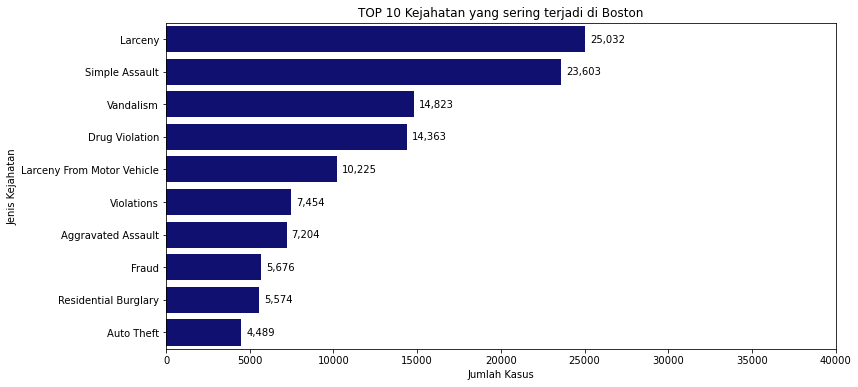

In [54]:
# membuat barplot berdasarkan jenis kejahatan [Crime Classification] dan kategori UCR I
ucr_table = df_crime[['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title('TOP 10 Kejahatan yang sering terjadi di Boston')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

## Melihat Jumlah Kasus Category Kejahatan Terbanyak di Boston berdasarkan UCR Part

seperti yang sudah dijelaskan sebelumnya bahwa kategori kejahatan dibagi menjadi 2 berdasarkan UCR Partnya oleh Department of Justice Federal Bureau of Investigation(FBI)  menjadi kategori kejahatan bagian 1 dan kategori kejahatan bagian 2. sekarang kita akan melihat kejahatan apa yang paling banyak di tiap kategorinya.

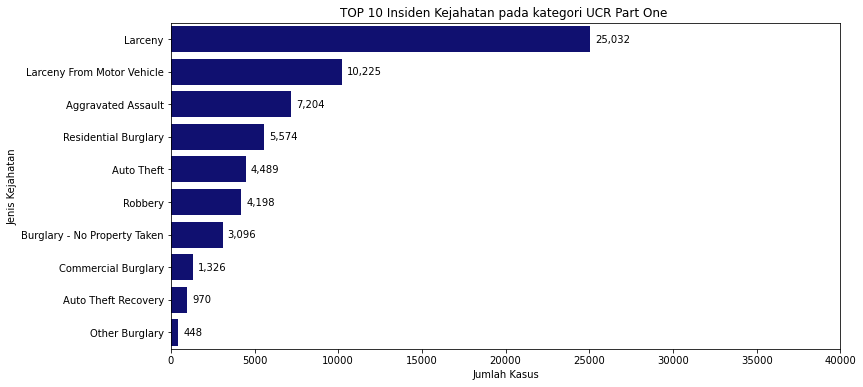

In [55]:
# membuat barplot berdasarkan jenis kejahatan [OFFENSE_CODE_GROUP] dan kategori UCR part One
ucr_table = df_crime[df_crime['UCR Part']=="Part One"][['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title("TOP 10 Insiden Kejahatan pada kategori UCR Part One ")
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

UCR Part 1 dapat dikatakan sebagai category kejahatan bagian 1. kategori-kategori kejahatan di UCR Part bagian 1 ini sudah diatur oleh Department of Justice Federal Bureau of Investigation(FBI). dapat dilihat pada visualisasi, kategori Larceni dan Larceny From Motor Vechicle masih menjadi kategori kriminal dengan kasus terbanyak dan kedua di UCR Part bagian 1, disusul  dengan aggravated Assault, Residential Burglary dan seterusnya seperti pada tampilan visual. dapat dilihat kebanyakan dari kategori kejahatan terbanyak di UCR Part 1 ini berhubungan dengan tindakan kriminal yang berjenis pencurian seperti(*Larceny, Larceny from Motor Vehicle, residential Burglary, Auto Theft dll*). kejahatan larceny bisa dicegah dengan memperbanyak pengawasan di kota boston, bisa dilakukan dengan penerapan cctv maupun penyebaran anggota di titik2 keramaian.

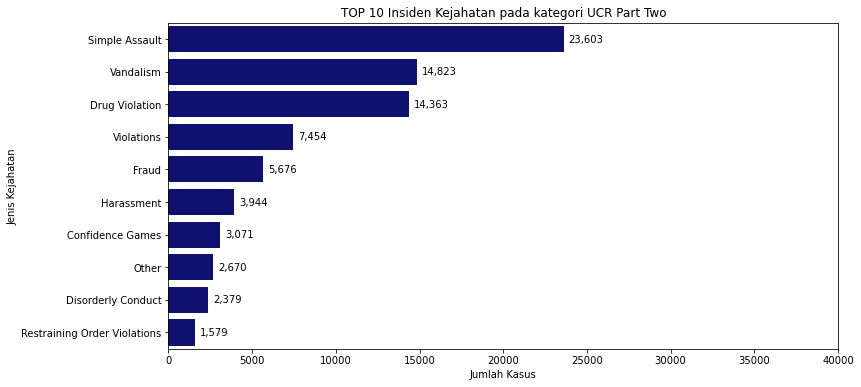

In [56]:
# membuat barplot berdasarkan jenis kejahatan [Crime Classification] dan kategori UCR Part 2
ucr_table = df_crime[df_crime['UCR Part']=="Part Two"][['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title(f'TOP 10 Insiden Kejahatan pada kategori UCR Part Two')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

UCR Part 2 dapat dikatakan sebagai category kejahatan bagian 2. kategori-kategori kejahatan di UCR Part bagian 2 ini ialah kejahatan selain yang sudah diatur pada UCR Part bagian 1. dapat dilihat pada visualisasi, kategori Simple Assault menjadi kategori kriminal dengan jumlah kasus terbanyak di UCR Part Part 2. kategori Drug Violation, dan Vandalism juga mempunyai jumlah kasus cukup banyak di banding kategori-kategori kejahatan lainnya di UCR Part Part 2. dapat dilihat bahwa kasus kejahatan yang sering terjadi pada pada UCR Part 2 mayoritas ialah kejahatan yang melibatkan sesama penduduk kota Boston(simple assault, violations, fraud, harrasment, Disorderly Conduct). kejahatan jenis ini seharusnya dapat dicegah jika banyak anggota polisi yang berjaga di titik-titik yang rawan akan terjadinya singgungan antar tiap warga boston

## Melihat Tren Kejahatan Berdasarkan Waktu
setelah mengetahui kejahatan mana yang paling sering terjadi di kota boston dan kejahatan mana yang paling sering terjadi di tiap UCR Partnya, sekarang kita akan melihat tren kejahatan berdasarkan waktu
1. tren kejahatan berdasarkan Tahun
1.. Tren kejahatan berdasarkan Bulan
1. Tren Kejahatan berdasarkan minggu
1. Tren Kejahatan berdasarkan hari
1. Tren Kejahatan berdasarkan jam

### Tren Kejahatan Berdasarkan Tahun

In [57]:
#melihat tanggal pengambilan data awal di tiap tahunnya
display(df.groupby("Year").min()["Date"],df.groupby("Year").max()["Date"])

Year
2015   2015-06-15
2016   2016-01-01
2017   2017-01-01
2018   2018-01-01
Name: Date, dtype: datetime64[ns]

Year
2015   2015-12-31 23:54:00
2016   2016-12-31 23:40:00
2017   2017-12-31 23:57:00
2018   2018-09-03 21:25:00
Name: Date, dtype: datetime64[ns]

Setelah dilakukan analisis lebih lanjut ditemukan bahwa pengambilan data pada tahun 2015 dan 2018 tidaklah komplit/sempurna pengambilannya, dikarenakan pada tahun 2015 data  yang tersedia hanya dimulai dari tanggal 15 bulan juni, sedangkan untuk tahun 2018, pengambilan data hanya sampai tanggal 3 september saja. maka dari itu, untuk menghindari bias kita akan melihat rata-rata perharinya di tiap waktu yang akan di analisis.

In [58]:
# membuat tabel yang berisi tanggal, jumlah kasus, dan tahun
kasus_tahunan = df_crime[['Date', 'Year']].copy()
kasus_tahunan['Date'] = pd.to_datetime(kasus_tahunan['Date'].sort_values()).dt.strftime('%d %b %y')
df_A = kasus_tahunan.groupby('Date').count().reset_index().rename(columns={'Date' : 'Tanggal', 'Year' : 'Jumlah Kasus'})
df_B = kasus_tahunan.groupby('Date').max().reset_index().rename(columns={'Date' : 'Tanggal', 'Year' : 'Tahun'})

kasus_tahunan = df_A.merge(df_B)
kasus_tahunan.head()

,Tanggal,Jumlah Kasus,Tahun
0,01 Apr 16,175,2016
1,01 Apr 17,125,2017
2,01 Apr 18,111,2018
3,01 Aug 15,143,2015
4,01 Aug 16,143,2016


In [59]:
# melihat rata-rata jumlah kasus pada tiap tahunan
rata_tahunan = kasus_tahunan.groupby('Tahun').mean().reset_index()
rata_tahunan.head()

,Tahun,Jumlah Kasus
0,2015,145.855000
1,2016,129.090164
2,2017,124.430137
3,2018,121.341463


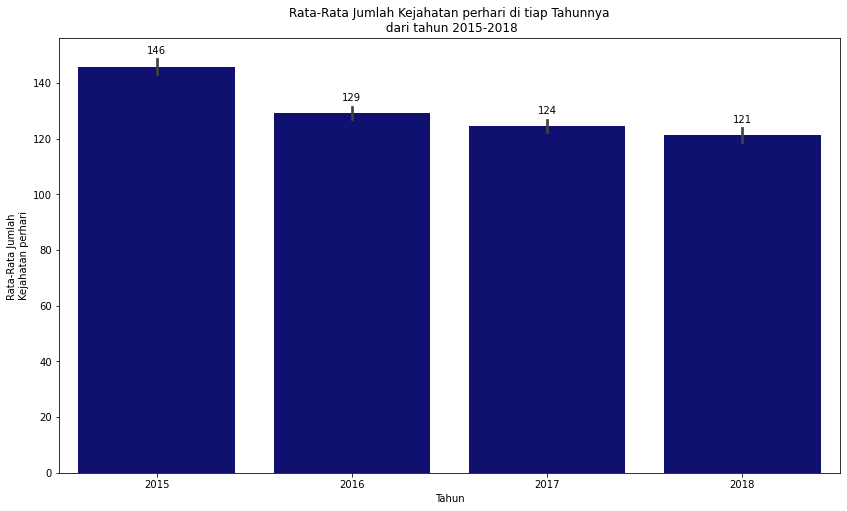

In [60]:
#visualisasi untuk melihat rata-rata Kasus Kejahatan  perhari pada Tahun 2015-2018
plt.figure(figsize=(14,8))
sns.barplot(data=kasus_tahunan, x='Tahun', y = 'Jumlah Kasus', palette=['navy'])
plt.title(f'Rata-Rata Jumlah Kejahatan perhari di tiap Tahunnya\n dari tahun 2015-2018')
for i in range(4):
    plt.text(-0.0491+i,rata_tahunan["Jumlah Kasus"].iloc[i]+4.5,round(rata_tahunan["Jumlah Kasus"].iloc[i]))
plt.ylabel("Rata-Rata Jumlah \nKejahatan perhari")
plt.show()

dapat dilihat di atas merupakan visualisasi rata-rata jumlajh kasus kejahatan perhari di tiap tahun dari tahun 2015-2018. alih-alih menggunakan jumlah kasus kriminal, digunakan rata-rata jumlah kasus perhari ditiap tahunnya seperti gambar visualisasi di atas agar memudahkan interpretasi dan mengurangi bias karena pengambilan data yang kurang lengkap di tiap tahunnya. dapat dilihat pada visualisasi dari tahun 2015 sampai 2018 terdapat tren penurunan rata-rata kasus kejahatan perharinya. hal ini membuktikan kebijakan yang sudah ada cukup baik sehingga dapat mengurangi rata-rata kasus perhari ditiap tahunnya. tapi tentu kebijakan perlu sering di tinjau ulang dan diperbaiki di kebijakan yang kurang efektif agar kebijakan selalu sesuai dengan keadaan yang dibutuhkan.

## Melihat Tren Kejahatan Berdasarkan Bulan

In [61]:
# membuat tabel yang berisi tanggal, jumlah kasus, dan bulan
kasus_bulanan = df_crime[['Date', 'Month']].copy()
kasus_bulanan['Date'] = pd.to_datetime(kasus_bulanan['Date'].sort_values()).dt.strftime('%d %b %y')
df_A = kasus_bulanan.groupby('Date').count().reset_index().rename(columns={'Date' : 'Tanggal', 'Month' : 'Jumlah Kasus'})
df_B = kasus_bulanan.groupby('Date').max().reset_index().rename(columns={'Date' : 'Tanggal', 'Month' : 'Bulan'})

kasus_bulanan = df_A.merge(df_B)
kasus_bulanan.head()

,Tanggal,Jumlah Kasus,Bulan
0,01 Apr 16,175,4
1,01 Apr 17,125,4
2,01 Apr 18,111,4
3,01 Aug 15,143,8
4,01 Aug 16,143,8


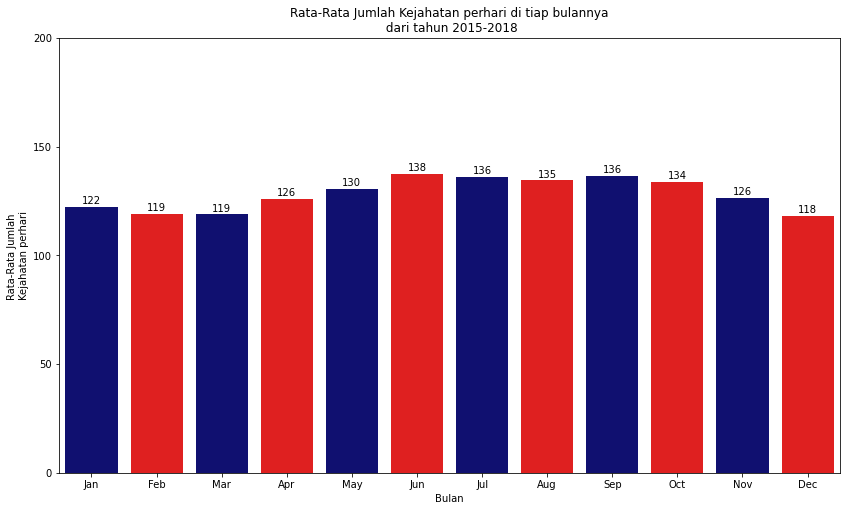

In [62]:
#visualisasi untuk melihat rata-rata Kasus Kejahatan di tiap bulannya pada Tahun 2015-2018
plt.figure(figsize=(14,8))
ax = sns.barplot(data=kasus_bulanan, x='Bulan', y = 'Jumlah Kasus', ci=0, palette=['navy', 'red'])
plt.title(f'Rata-Rata Jumlah Kejahatan perhari di tiap bulannya\n dari tahun 2015-2018')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.yticks(range(0,201,50))
plt.xticks(range(0,12),months)
plt.ylabel('Rata-Rata Jumlah \nKejahatan perhari')
ax;

sama seperti visualisasi kejahatan di tiap tahunnya, untuk menghindari bias, maka saat membandingkan jumlah kejahatan di tiap bulannya yang dipakai adalah rata-rata jumlah kasus perhari ditiap bulannya dari tahun 2015 s/d 2018, seperti visualisasi diatas. didapatkan pola bahwa tingkat kriminalitas naik pada bulan sekitar april dan sampai puncaknya di bulan september. setelah september jumlah kriminalitas cenderung turun dari bulan ke bulan selanjutnya. hal ini kemungkinan besar berhubungan dengan bulan produktif di amerika serikat. akhir bulan maret ialah bulan berahirnya musim dingin, dan menandakan awal musim semi, yang dimana : 
1. boston akan dipenuhi oleh pelajar pelajar dari seluruh amerika bahkan seluruh dunia dikarenakan boston ialah kota pelajar di amerika karena banyaknya pelajar disana dan juga tentu karena kualitas pendidikan kota boston yang terbaik di amerika serikat, sehingga seluruh pelajar yang belajar di kota boston tentu akan kembali memnuhi kota boston setelah liburan musim dingin.
2. bulan maret-agustus ialah bulan yang paling disenangi oleh turis untuk datang ke amerika karena sedang dalam musim semi dan gugur yang suhunya cenderung disukai oleh turis.
alasan2 diataslah yang tentu akan menyababkan lonjakan populasi di boston daripada bulan2 lainnya, yang tentu akan membuat kemungkinan para pelaku kriminalitas melakukan kejahatan lebih tinggi. maka dari itu dibutuhkan anggota ekstra di bulan-bulan dengan tingkat kriminalitas yang tinggi yaitu bulan-bulan di bulan yang bermusim semi dan panas(april, mei, juni, juli, agustus, september).


## Melihat Mayoritas Kejahatan yang muncul di Bulan yang mempunyai rata-rata jumlah kasus tertinggi.
setelah mengetahui bulan-bulan mana yang memiliki rata-rata jumlah kasus tertinggi(april-september), sekarang akan dilakukan pengecekan untuk mengetahui mayoritas pelanggaran apa yang dilakukan di bulan-bulan tersebut.

In [63]:
#Melihat Mayoritas Kejahatan yang muncul di Bulan yang mempunyai rata-rata jumlah kasus tertinggi
df_crime[df_crime['Month'].isin([4,5,6,7,8,9])][['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)

,Jenis Kejahatan,Jumlah Kasus
0,Larceny,13939
1,Simple Assault,13153
2,Vandalism,8248
3,Drug Violation,7798
4,Larceny From Motor Vehicle,5669
5,Aggravated Assault,4187
6,Violations,3946
7,Fraud,3146
8,Residential Burglary,3104
9,Auto Theft,2707


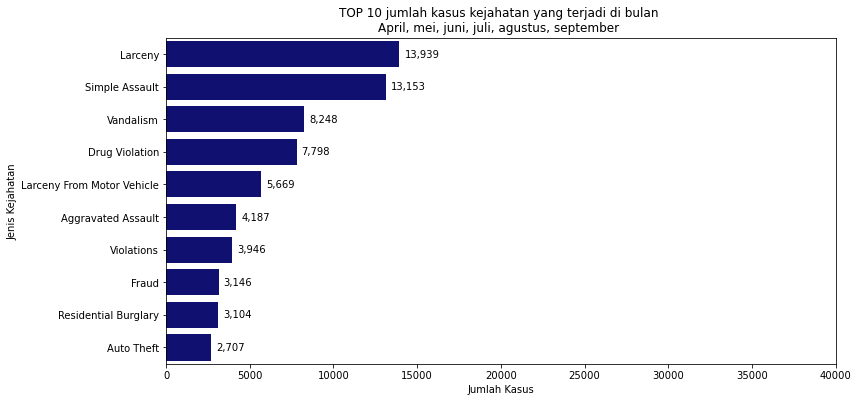

In [64]:
# membuat barplot untuk melihat kejahatan apa yang sering terjadi di bulan-bulan dengan rata-rata jumlah kasus tertinggi
ucr_table = df_crime[df_crime['Month'].isin([4,5,6,7,8,9])][['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title(f'TOP 10 jumlah kasus kejahatan yang terjadi di bulan \nApril, mei, juni, juli, agustus, september ')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

dapat dilihat pada visualisasi mayoritas kejahatan yang terjadi pada bulan dengan rata-rata kriminalitas tertinggi ialah masih Larceny dan Simple Assault. kejahatan Larceny dan Simple Assault sangat berhubungan sekali apabila dihubungkan dengan tingkat kepadatan suatu kota. seperti yang sudah dijelaskan sebelumnya bahwa semakin ramai orang yang melakukan aktifitas di suatu kota akan membuat peluang kejahatan semakin naik. meningkatkan pengawasan di area-area yang akan berpotensi ramai, maka dari itu dibutuhkan anggota ekstra di bulan-bulan dengan tingkat kriminalitas yang tinggi. selain itu juga perlu lebih dirutinkan kampanye untuk mengingatkan warga boston untuk selalu peduli dengan orang dan barang di bulan-bulan yang mempunyai rata-rata jumlah kasus tertinggi perhari di tiap bulan. dapat seperti membuat iklan di billboard kota, membuat pamplet tentang cara meminimalisir kejahatan, dan masih banyak lagi agar masyarakat menjadi lebih berhati-hati di bulan-bulan yang memiliki rata-rata jumlah kasus perhari tertinggi.

## Melihat Tren Kejahatan Berdasarkan Minggu

In [65]:
# membuat tabel yang berisi tanggal, jumlah kasus, dan status pekan (Weekday/Weekend)
kasus_week = df_crime[['Date', 'WEEK']].copy()
kasus_week['Date'] = pd.to_datetime(kasus_week['Date'].sort_values()).dt.strftime('%d %b %y')
df_A = kasus_week.groupby('Date').count().reset_index().rename(columns={'Date' : 'Tanggal', 'WEEK' : 'Jumlah Kasus'})
df_B = kasus_week.groupby('Date').max().reset_index().rename(columns={'Date' : 'Tanggal', 'WEEK' : 'Minggu'})

kasus_week = df_A.merge(df_B)
kasus_week.head()

,Tanggal,Jumlah Kasus,Minggu
0,01 Apr 16,175,Weekday
1,01 Apr 17,125,Weekend
2,01 Apr 18,111,Weekend
3,01 Aug 15,143,Weekend
4,01 Aug 16,143,Weekday


In [66]:
# melihat rata-rata kasus kejahatan perhari di minggunya 
rata_week = kasus_week.groupby("Minggu").mean().reset_index()
rata_week.head()

,Minggu,Jumlah Kasus
0,Weekday,133.158145
1,Weekend,118.151786


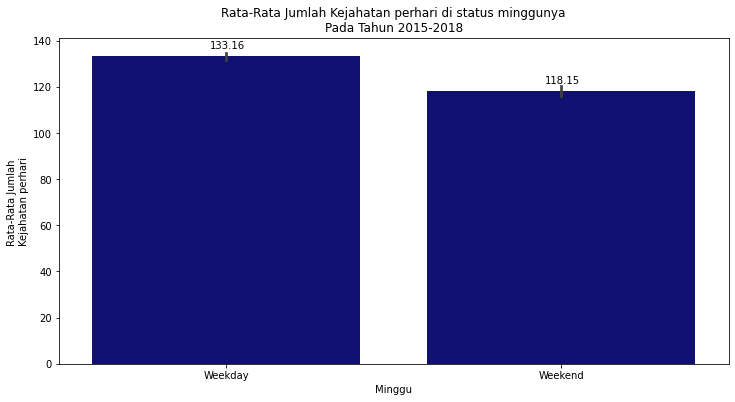

In [67]:
# visualisasi untuk melihat rata-rata Kasus Kejahatan perhari ditiap status minggunya pada Tahun 2015-2018
plt.figure(figsize=(12,6))
ax = sns.barplot(data=kasus_week, x='Minggu',y="Jumlah Kasus",color="navy")
plt.title(f'Rata-Rata Jumlah Kejahatan perhari di status minggunya\nPada Tahun 2015-2018')
plt.xlabel('Minggu')
plt.ylabel('Rata-Rata Jumlah Kasus')
#for i in range(0,2):
plt.text(-0.050,rata_week["Jumlah Kasus"].loc[0]+3.5,round(rata_week["Jumlah Kasus"].iloc[0],2))
plt.text(0.950,rata_week["Jumlah Kasus"].loc[1]+3.5,round(rata_week["Jumlah Kasus"].iloc[1],2))
plt.ylabel('Rata-Rata Jumlah \nKejahatan perhari')
plt.show()

didapatkan rata-rata kasus kejahatan perhari di hari yang weekday adalah 142.25 di tiap minggunya. sedangkan rata-rata kasus kejahatan di tiap minggu di hari weekend ialah 125.76. secara sekilas terdapat perbedaan rata-rata diantara 2 kelas tersebut. untuk konfirmasi perbedaan di tiap rata-ratanya maka diujikan uji hipotesis untuk membandingkan kedua rata-rata dari kelas tersebut. digunakanan hipotesis 
* h0 = kedua kelas memiliki rata-rata yang sama/tidak ada perbedaan
* h1 = kedua kelas memiliki rata-rata yang berbeda satu sama lainnya

In [68]:
# uji hipotesis untuk konfirmasi perbedaan nilai rata-rata diantara kedua kelas
# Import Library
from scipy.stats import ttest_ind

# Two sample independent t-test
result = list(ttest_ind(
                kasus_week[kasus_week['Minggu'] == 'Weekday']['Jumlah Kasus'],
                kasus_week[kasus_week['Minggu'] == 'Weekend']['Jumlah Kasus'],
                equal_var = False))

print('T-statistic:', result[0])
print('P-Value:', result[1]/2)

# Conclusion
if result[1]/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

T-statistic: 11.321866640140366
P-Value: 1.6677601970001745e-27
Tolak H0


didapatkan nilai p-value lebih dari 0.05. maka kita punya cukup bukti untuk mengatakan kedua kelas tersebut memiliki rata-rata yang berbeda. perbedaan rata-rata ini disinyalir sama seperti bulan, yaitu berhubungan dengan hari masuk dari perkantoran dan persekolahan. seperti yang sudah dijelaskan sebelumnya Boston adalah kota pelajar dan juga kota industri membuat boston menjadi kota terbesar ke-21 di amerika serikat dan nomor 1 di negara bagian Massachusetts. jadi tentu hari weekdays akan terdapat kepadatan di kota boston dengan urusan-urusannya masing-masing, dibanding dengan hari yang weekend, yang membuat pelaku kejahatan menjadi lebih berpeluang untuk melakukan kejahatannya. kepoisian departemen boston perlu memberikan extra energinya dan spent lebih banyak waktunya di hari-hari weekdays agar dapat lebih mengontrol rata-rata jumlah kasus kriminal perhari di kota boston.

## Melihat Tren Kejahatan Berdasarkan Hari

In [69]:
# membuat tabel yang berisi tanggal, jumlah kasus, dan hari (Weekday/Weekend)
kasus_hari = df_crime[['Date', 'Day Name']].copy()
kasus_hari['Date'] = pd.to_datetime(kasus_hari['Date'].sort_values()).dt.strftime('%d %b %y')
df_A = kasus_hari.groupby('Date').count().reset_index().rename(columns={'Date' : 'Tanggal', 'Day Name' : 'Jumlah Kasus'})
df_B = kasus_hari.groupby('Date').max().reset_index().rename(columns={'Date' : 'Tanggal', 'Day Name' : 'Hari'})

kasus_hari = df_A.merge(df_B)
kasus_hari.head()

,Tanggal,Jumlah Kasus,Hari
0,01 Apr 16,175,Friday
1,01 Apr 17,125,Saturday
2,01 Apr 18,111,Sunday
3,01 Aug 15,143,Saturday
4,01 Aug 16,143,Monday


In [70]:
# mencari rata-rata jumlah kasus di setiap harinya
rata_hari = kasus_hari.groupby("Hari").mean().reset_index()[['Hari',"Jumlah Kasus"]]
s1 = pd.Series([6,2,7,1,5,3,4])
rata_hari
rata_hari1 = pd.concat([rata_hari,s1],axis=1).sort_values(0).set_index(0)
rata_hari1

,Hari,Jumlah Kasus
0,,
1,Sunday,112.398810
2,Monday,129.266272
3,Tuesday,132.130952
4,Wednesday,133.815476
5,Thursday,133.172619
6,Friday,137.428571
7,Saturday,123.904762


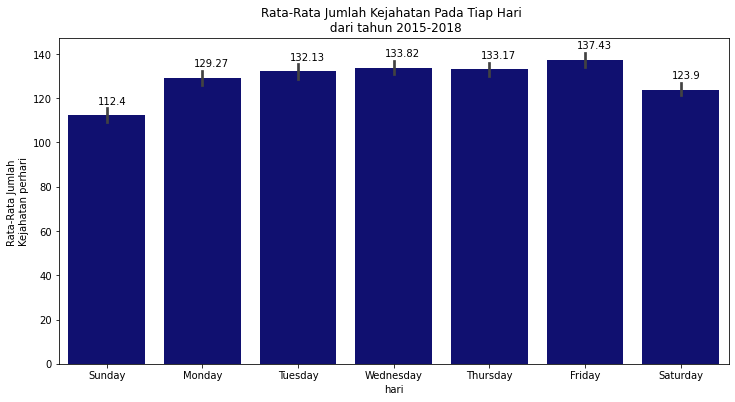

In [71]:
# membuat barplot untuk melihat visualisasi rata-rata jumlah kejahatan di setiap harinya
plt.figure(figsize=(12,6))
ax = sns.barplot(data=kasus_hari, x="Hari",y='Jumlah Kasus', color='navy',order=["Sunday",'Monday',"Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.title(f'Rata-Rata Jumlah Kejahatan Pada Tiap Hari \n dari tahun 2015-2018')
plt.xlabel(f'hari')
plt.ylabel('Jumlah Kasus')
for i in range(7):
    plt.text(-0.0900+i,rata_hari1['Jumlah Kasus'].iloc[i]+5,round(rata_hari1['Jumlah Kasus'].iloc[i],2))
plt.ylabel('Rata-Rata Jumlah \nKejahatan perhari')
plt.show()

dapat dilihat pada visualisasi, sama seperti rata-rata jumlah kasus berdasarkan minggunya, visualisasi rata-rata jumlah kasus berdasarkan tiap harinya juga menunjukan bahwa hari senin, selasa, rabu, kamis, jumat memiliki rata-rata yang lebih tinggi daripada hari sabtu,minggu. hari minggu merupakan hari dengan kasus kriminalitas terendah diantara hari-hari lainnya, sedangkan jumat merupakan hari dengan rata-rata jumlah kasus terbanyak. kepolisian departemen boston dapat memfokuskan penanganan di hari weekdays dan menggunakan hari sabtu dan minggu untuk rolling libur anggotanya agar tetap menjaga work life balance angogotanya.

## Melihat Tren Kejahatan Berdasarkan jam

In [72]:
#membuat tabel dengan kolom nama jam dan jumlah kasus
crime_jam = df_crime.groupby("Hour").count()[["Day Name"]].reset_index()
crime_jam['Hour'] = crime_jam['Hour'].replace({0:24})
crime_jam = crime_jam.sort_values('Hour').reset_index()
crime_jam.drop(columns='index',inplace=True)
crime_jam.rename(columns={"Day Name":"Jumlah Kasus"},inplace=True)
crime_jam

,Hour,Jumlah Kasus
0,1,4529
1,2,3715
2,3,2090
3,4,1580
4,5,1360
5,6,1973
6,7,3316
7,8,5453
8,9,6432
9,10,7356


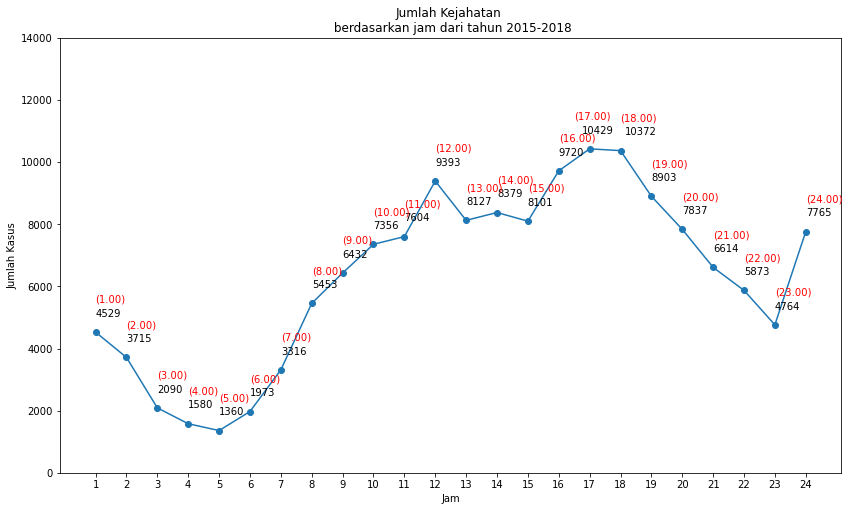

In [73]:
#visualisasi untuk melihatt jumlah kasus berdasarkan jamnya
plt.figure(figsize=(14,8))
sns.lineplot(data=crime_jam,x="Hour",y="Jumlah Kasus")#default akan menampilkan rata2 (agregat) dari jumlah penumpang
plt.scatter(crime_jam['Hour'],crime_jam["Jumlah Kasus"])
plt.title(f'Jumlah Kejahatan \n berdasarkan jam dari tahun 2015-2018')
for i in range(0,24):
    if i == 17:
        plt.text(crime_jam['Hour'].iloc[i]+0.15,crime_jam["Jumlah Kasus"].iloc[i]+500,crime_jam["Jumlah Kasus"].iloc[i])
    elif i == 16:
        plt.text(crime_jam['Hour'].iloc[i]-0.25,crime_jam["Jumlah Kasus"].iloc[i]+500,crime_jam["Jumlah Kasus"].iloc[i])
    else:
        plt.text(crime_jam['Hour'].iloc[i],crime_jam["Jumlah Kasus"].iloc[i]+500,crime_jam["Jumlah Kasus"].iloc[i])
for i in range(0,24):
    if i == 16:
        plt.text(crime_jam['Hour'].iloc[i]-0.5,crime_jam["Jumlah Kasus"].iloc[i]+950,f"({i+1}.00)",color='red')
    else:
        plt.text(crime_jam['Hour'].iloc[i],crime_jam["Jumlah Kasus"].iloc[i]+950,f"({i+1}.00)",color='red')
plt.xlabel("Jam")
plt.ylabel("Jumlah Kasus")
plt.xticks(range(1,25))
plt.yticks(np.arange(0,15001,2000))
plt.show()

In [74]:
#rata-rata jumlah kasus kejadian kejahatan dari setiap jamnya
np.mean(crime_jam["Jumlah Kasus"])

6320.208333333333

dapat dilihat seperti pada visualisasi, bahwa jumlah kasus relatif rendah di pukul 1.00 sampai dengan pukul 6.00. kasus tertinggi terdapat pada pukul 17.00 dan 18.00, dan setelah pukul 18.00 ada tren penurunan jumlah kasus sampai pukul 23.00. bila kita lihat lebih teliti jumlah kasus kejadian yang ada di atas rata-rata jumlah kejadian di setiap jamnya ada di jam-jam produktif/kerja/ramai di setiap kota pada umumnya yaitu sekitar pukul 09.00 - 20.00. hal ini bisa terjadi dikarenakan sama seperti sebelumnya, bahwa ada hubungannya antara jumlah populasi di "jalanan" boston dengan tingkat kriminalitas. maka seharusnya bisa memperbanyak jadwal patroli polisi di sekitar jam 09.00 - 20.00.

## Melihat Mayoritas Kejahatan berdasarkan district

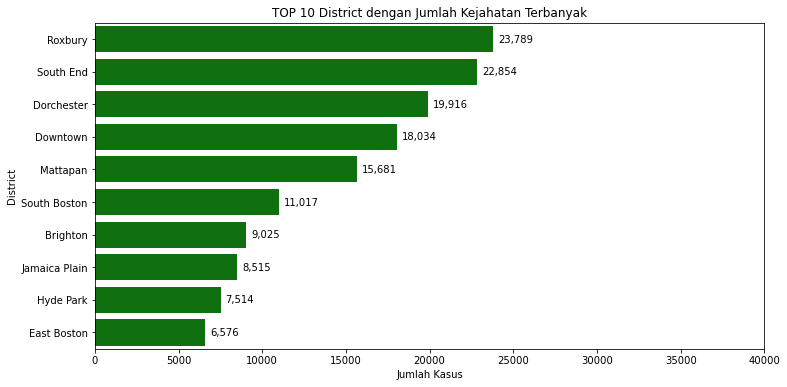

In [75]:
#visualisasi melihat jumlah kasus kejahatan terbanyak berdasarkan ditrictnya
ucr_table = df_crime[['District']].value_counts().reset_index().rename(columns={0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='District', ci=0, order=ucr_table['District'], palette=['green'])
plt.title(f'TOP 10 District dengan Jumlah Kejahatan Terbanyak')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

dapat dilihat melalui visualisasi bahwa district di kota boston dengan jumlah kasus kejahatan terbanyak berturut-turut ialah roxbury, south end,dorchester,downtown,mattapan. dan selebihnya memiliki jumlah kasus kejahatan tidak jauh berbeda

## Melihat Mayoritas Kejahatan yang muncul di District yang mempunyai jumlah kasus tertinggi.
setelah mengetahui District-District mana yang memiliki jumlah kasus tertinggi(roxbury, south end,dorchester,downtown,mattapan), sekarang akan dilakukan pengecekan untuk mengetahui mayoritas pelanggaran apa yang dilakukan di district-district tersebut.

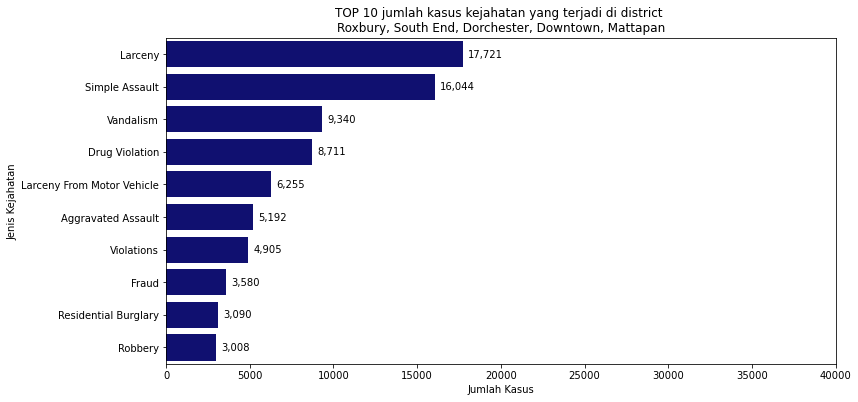

In [76]:
# membuat barplot untuk melihat kejahatan apa yang sering terjadi di bulan-bulan dengan rata-rata jumlah kasus tertinggi
ucr_table = df_crime[df_crime['District'].isin(["Roxbury",'South End','Dorchester','Downtown','Mattapan',])][['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title(f'TOP 10 jumlah kasus kejahatan yang terjadi di district \nRoxbury, South End, Dorchester, Downtown, Mattapan')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

larceny dan simple assault masih menjadi mayoritas kejahatan di district-district yang mempunyai kasus kejahatan tertinggi sama seperti kategori mayoritas kejahatan di kota Boston. maka kepolisian departemen Boston dapat melakukan kordinasi dengan kepolisian di tingkat district agar dapat untuk membantu penanganan kasus kriminal di category Larceny dan Simple Assault di districtnya masing-masing.

## 2. Melihat Bagaimana Karakteristik Respon Polisi di kota Boston
setelah melihat bagaimana karakteristik kejahatan di kota Boston, sekarang kita akan melihat bagaimana Karakteristik respon kepolisian di Kota Boston yang ditinjau dari beberapa aspek.

### melihat mayoritas tindakan respon dari kepolisian kota boston 

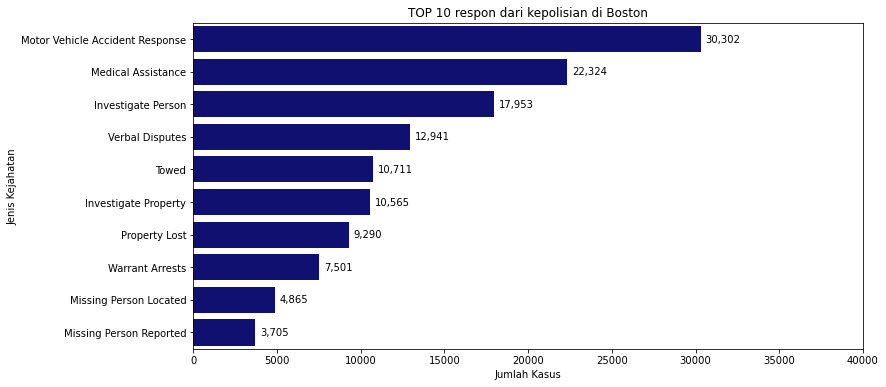

In [77]:
#visualisasi melihat top 10 respon dari kepolisian
ucr_table = df_police[['Crime Classification']].value_counts().reset_index().rename(columns={'Crime Classification' : 'Jenis Kejahatan', 0 : 'Jumlah Kasus'}).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ucr_table, x = 'Jumlah Kasus', y ='Jenis Kejahatan', ci=0, order=ucr_table['Jenis Kejahatan'], palette=['navy'])
plt.title('TOP 10 respon dari kepolisian di Boston')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xticks(range(0,40001,5000))
plt.show()

dapat dilihat Motor Vehicle Accident Response(penanganan kecelakaan kendaraan bermotor) menjadi kasus yang paling sering ditangani oleh kepolisian di tahun 2015-2018, disusul dengan medical Assistance(bantuan medis)dan Investigate Person(investigasi seseorang). jumlah kasus penanganan Motor Vehicle Accident relatif mempunyai jumlah kasus yang besar apabaila dibanding dengan kasus-kasus lainnya. hal ini memberikan insight bahwa masih sering sekali terjadi kecelakaan di kota Boston. didapatkan fakta bahwa jalanan kota boston mendapat kritikan di beberapa media di amerika. contoh salah satu jalan di kota Boston yaitu jalan BlueHill Eve sering mendapat kritikan karena ketidakpuasan dari warga boston, seperti jalan yang sangat ramai hingga menyebabkan kemacetan apabila di jam-jam sibuk, jalur sepeda yang terlalu dekat dengan jalur mobil, jalan banyak yang berlubang. untuk mengatasi masalah kecelakaan tentu kepolisian departemen boston dan pemerintah hars melakukan suatu kolaborasi agar dapat menurunkan jumlah kecelakaan di boston, tapi setidaknya kepolisian departemen boston dapat sering-sering melakukan kampanye untuk berkendara yang baik dan benar di jalanan boston atau membantu menyarankan warga boston untuk naik angkutan umum saja. selain itu apabila dilihat juga medical assistance ialah respon terbanyak kedua yang dilakukan kepolisian, berarti diperlukannya diberikan tambahan ilmu-ilmu dasar pengobatan untuk seluruh anggota kepolisian kota boston. 

### melihat jam sibuk dari kepolisian

In [78]:
#membuat tabel dengan kolom nama jam dan jumlah kasus
police_jam = df_police.groupby("Hour").count()[["Day Name"]].reset_index()
police_jam['Hour'] = police_jam['Hour'].replace({0:24})
police_jam = police_jam.sort_values('Hour').reset_index()
police_jam.drop(columns='index',inplace=True)
police_jam.rename(columns={"Day Name":"Jumlah Kasus"},inplace=True)
police_jam

,Hour,Jumlah Kasus
0,1,3851
1,2,3169
2,3,2121
3,4,1566
4,5,1695
5,6,2678
6,7,4933
7,8,6721
8,9,7442
9,10,8027


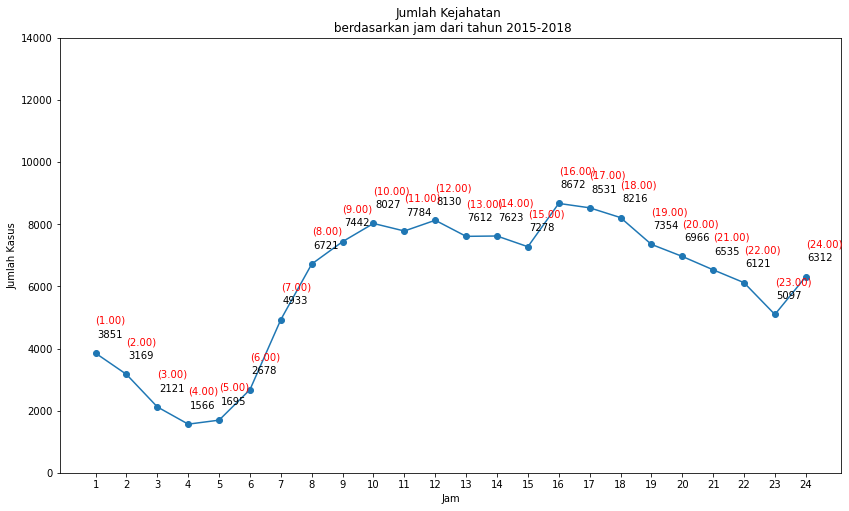

In [79]:
#visualisasi untuk melihat jumlah respon dari kepolisian ditiap jamnya
plt.figure(figsize=(14,8))
sns.lineplot(data=police_jam,x="Hour",y="Jumlah Kasus")#default akan menampilkan rata2 (agregat) dari jumlah penumpang
plt.scatter(police_jam['Hour'],police_jam["Jumlah Kasus"])
plt.title(f'Jumlah Kejahatan \n berdasarkan jam dari tahun 2015-2018')
for i in range(0,24):
    plt.text(police_jam['Hour'].iloc[i]+0.05,police_jam["Jumlah Kasus"].iloc[i]+500,police_jam["Jumlah Kasus"].iloc[i])
for i in range(0,24):
    plt.text(police_jam['Hour'].iloc[i],police_jam["Jumlah Kasus"].iloc[i]+950,f"({i+1}.00)",color='red')
plt.xlabel("Jam")
plt.ylabel("Jumlah Kasus")
plt.xticks(range(1,25))
plt.yticks(np.arange(0,15001,2000))
plt.show()

dapat dilihat pada visualisasi, jam sibuk kepolisian ialah dari sekitar pukul 8.00 - 19.00. maka disarankan untuk memperbanyak anggota siaga di sekitar jam 8.00 - 19.00 ini agar dapat melakukan respon tindak kejahatan dengan cepat.

# kesimpulan dan rekomendasi

## kesimpulan
dari analisis yang telah dilakukan, dapat diambil kesimpulan bahwa 
karakteristik kejahatan di kota Boston:
1. mayoritas kejahatan di kota Boston ialah Larceny dan Simple Assault
2. mayoritas kejahatan dengan UCR bagian One ialah kejahatan yang berjenis pencurian seperti larceny, larceny from motorcycle, residential buglary, dll
3. mayoritas kejahatan dengan UCR bagian Two ialah kejahatan yang berjenis yang melibatkan sesama penduduk kota Boston seperti simple assault, disordely conduct, dll
4. pengambilan data kurang lengkap satu tahun ditahun 2015 dan 2018
5. rata-rata jumlah kasus kejahatan perhari di tiap tahunnya mengalami penurunan dari tahun 2015 sampai 2018
6. rata-rata jumlah kasus kejahatan perhari di bulan yang bermusim semi dan panas, seperti: april, mei, juni, juli, agustus, september lebih tinggi dibanding  rata-rata jumlah kasus kejahatan perhari di bulan yang bermusim gugur dan dingin,seperti oktober, november, desember, januari, februari, maret
7. rata-rata jumlah kasus kejahatan perhari di hari yang weekday lebih tinggi dibanding rata-rata jumlah kasus kejahatan perhari di hari yang weekday
8. rata-rata jumlah kasus kejahatan berdasarkan harinya menunjukan bahwa hari minggu memiliki rata-rata jumlah kasus terendah
9. jam yang jumlah kasus kejadianya yang ada di atas rata-rata jumlah kejadian di setiap jamnya ada di jam-jam produktif/kerja/ramai perkotaan pada umumnya yaitu sekitar pukul 09.00 - 20.00.
10. district dengan kejahatan terbanyak dipegang oleh district Roxbury, disusul oleh South End, Dorchester, Downtown, mattapan.
11. mayoritas kejahatan di 5 district dengan kejahatan terbanyak, ialah larceny dan simple assault

karakteristik respon kepolisian di kota Boston:
1. Motor Vehicle Accident Response(penganan kecelakaan kendaraan bermotor) menjadi kasus yang paling sering ditangani oleh kepolisian di tahun 2015-2018, disusul dengan medical Assistance(bantuan medis)dan Investigate Person(investigasi seseorang).
2. jam sibuk kepolisian ialah dari sekitar pukul 8.00 - 19.00.

## rekomendasi
1. perlu pengawasan yang lebih lagi dari kepolisian kota  boston untuk menaruh atau menyabarkan anggota-anggota nya dekat dengan titik yang banyak di lewati warga atau titik dimana tempat yang sering terjadi keramaian.
2. penerapan cctv di tempat-tempat yang rawan pencurian
3. kebijakan perlu sering di tinjau ulang dan diperbaiki di kebijakan yang kurang efektif agar kebijakan selalu sesuai dengan keadaan yang dibutuhkan.
4. dibutuhkan anggota ekstra dan memperbanyak kampanye untuk mengingatkan warga boston tentang kejahatan pencurian, pengancaman, dll di bulan-bulan dengan tingkat kriminalitas yang tinggi yaitu bulan-bulan di bulan yang bermusim semi dan panas(april, mei, juni, juli, agustus, september).
5. perlu menambah personel kepolisian yang bertugas dan jam kerjanya di hari-hari weekdays, dan memberikan rolling libur di hari sabtu dan minggu agar tercipta work life balance.
6. memperbanyak jadwal patroli polisi di sekitar jam 09.00 - 20.00.
7. melakukan kordinasi atau kerja sama dengan kepolisian di tingkat ditrict yang mempunyai jumlah kasus kejahatan tertinggi untuk menangani kasus kejahatan bersama-sama
8. memperbanyak kampanye untuk berkendara yang baik dan benar di jalanan boston dan memperbanyak kampanye untuk merekomendasikan warga boston untuk naik angkutan umum.
9. memberikan tambahan ilmu-ilmu dasar pengobatan untuk seluruh anggota kepolisian kota boston. 
10. memperbanyak anggota siaga di kantor kepolisian di sekitar jam 8.00 - 19.00.
11. Pengambilan data seharusnya diusahakan lengkap agar lebih banyak insight yang dapat diambil.